# Bank Transaction Analysis

Hello, my name is Widya.
In this project, I will explore bank transaction data to uncover spending patterns, transaction types, customer demographics, and detect potential anomalies using Python.

## Importing Data

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = "/content/drive/MyDrive/Portfolio/Datasets/bank_transactions_data_2.csv"
df = pd.read_csv(url)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
print(df)

     TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2507      TX002508   AC00297             856.21  2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54  2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63  2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97  2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08  2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.

In [6]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False)

Series([], dtype: int64)

In [7]:
df.describe(include='all')

TransactionID AccountID  TransactionAmount      TransactionDate  \
count           2512      2512        2512.000000                 2512   
unique          2512       495                NaN                 2512   
top         TX002496   AC00460                NaN  2023-04-03 16:07:53   
freq               1        12                NaN                    1   
mean             NaN       NaN         297.593778                  NaN   
std              NaN       NaN         291.946243                  NaN   
min              NaN       NaN           0.260000                  NaN   
25%              NaN       NaN          81.885000                  NaN   
50%              NaN       NaN         211.140000                  NaN   
75%              NaN       NaN         414.527500                  NaN   
max              NaN       NaN        1919.110000                  NaN   

       TransactionType    Location DeviceID      IP Address MerchantID  \
count             2512        2512     2512            2512       2512   
unique               2          43      681             592        100   
top              Debit  Fort Worth  D000548  200.136.146.93       M026   
freq              1944          70        9              13         45   
mean               NaN         NaN      NaN             NaN        NaN   
std                NaN         NaN      NaN             NaN        NaN   
min                NaN         NaN      NaN             NaN        NaN   
25%                NaN         NaN      NaN             NaN        NaN   
50%                NaN         NaN      NaN             NaN        NaN   
75%                NaN         NaN      NaN             NaN        NaN   
max                NaN         NaN      NaN             NaN        NaN   

       Channel  CustomerAge CustomerOccupation  TransactionDuration  \
count     2512  2512.000000               2512          2512.000000   
unique       3          NaN                  4                  NaN   
top     Branch          NaN            Student                  NaN   
freq       868          NaN                657                  NaN   
mean       NaN    44.673965                NaN           119.643312   
std        NaN    17.792198                NaN            69.963757   
min        NaN    18.000000                NaN            10.000000   
25%        NaN    27.000000                NaN            63.000000   
50%        NaN    45.000000                NaN           112.500000   
75%        NaN    59.000000                NaN           161.000000   
max        NaN    80.000000                NaN           300.000000   

        LoginAttempts  AccountBalance PreviousTransactionDate  
count     2512.000000     2512.000000                    2512  
unique            NaN             NaN                     360  
top               NaN             NaN     2024-11-04 08:09:17  
freq              NaN             NaN                      16  
mean         1.124602     5114.302966                     NaN  
std          0.602662     3900.942499                     NaN  
min          1.000000      101.250000                     NaN  
25%          1.000000     1504.370000                     NaN  
50%          1.000000     4735.510000                     NaN  
75%          1.000000     7678.820000                     NaN  
max          5.000000    14977.990000                     NaN

In [8]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

From the dataframe info we see that the TransactionDate and PreviousTransactionDate is not in the right data type, so we'll do some feature engineering.

In [9]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["PreviousTransactionDate"] = pd.to_datetime(df["PreviousTransactionDate"])

In [10]:
df["DaysSinceLastTransaction"] = (df["PreviousTransactionDate"] - df["TransactionDate"]).dt.days

In [11]:
df["TransactionHour"] = df["TransactionDate"].dt.hour
df["TransactionDayOfWeek"] = df["TransactionDate"].dt.dayofweek

In [12]:
df["BalanceChangeRatio"] = df["TransactionAmount"] / df["AccountBalance"]

df.head()

TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  DaysSinceLastTransaction  \
0         5112.21     2024-11-04 08:08:08                       572   
1        13758.91     2024-11-04 08:09:35                       495   
2         1122.35     2024-11-04 08:07:04                       482   
3         8569.06     2024-11-04 08:09:06                       548   
4         7429.40     2024-11-04 08:06:39                       384   

   TransactionHour  TransactionDayOfWeek  BalanceChangeRatio  
0               16                     1            0.002756  
1               16                     1            0.027345  
2               18                     0            0.112523  
3               16                     4            0.021531  
4               17                     0            0.001810

In [13]:
from sklearn.preprocessing import LabelEncoder
df["OccupationEncoded"] = LabelEncoder().fit_transform(df["CustomerOccupation"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TransactionID             2512 non-null   object        
 1   AccountID                 2512 non-null   object        
 2   TransactionAmount         2512 non-null   float64       
 3   TransactionDate           2512 non-null   datetime64[ns]
 4   TransactionType           2512 non-null   object        
 5   Location                  2512 non-null   object        
 6   DeviceID                  2512 non-null   object        
 7   IP Address                2512 non-null   object        
 8   MerchantID                2512 non-null   object        
 9   Channel                   2512 non-null   object        
 10  CustomerAge               2512 non-null   int64         
 11  CustomerOccupation        2512 non-null   object        
 12  TransactionDuration 

Summarytools library will be used for quick overlook into the dataframe.

In [15]:
pip install SummaryTools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00


In [16]:
from summarytools import dfSummary
dfSummary(df)

From the summary above, I will create visualizations to help stakeholders quickly grasp the overall picture of the data.

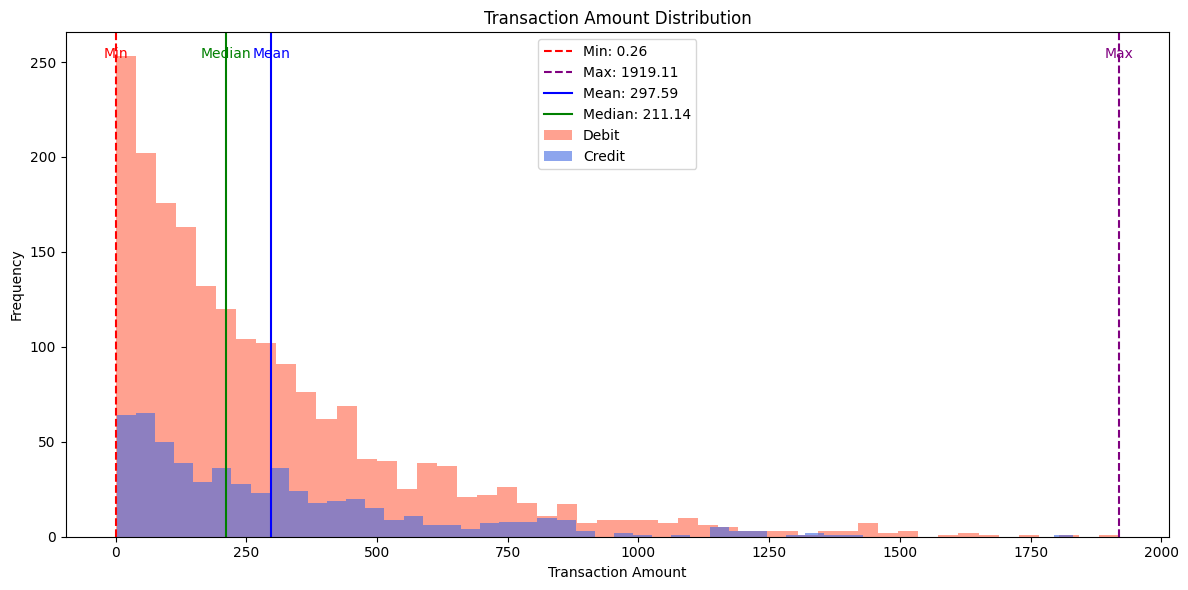

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate Debit and Credit transactions
debit = df[df['TransactionType'] == 'Debit']['TransactionAmount']
credit = df[df['TransactionType'] == 'Credit']['TransactionAmount']

# Summary statistics
min_val = df['TransactionAmount'].min()
max_val = df['TransactionAmount'].max()
mean_val = df['TransactionAmount'].mean()
median_val = df['TransactionAmount'].median()

# Plot
plt.figure(figsize=(12, 6))

# Plot Debit histogram
sns.histplot(debit, bins=50, color='tomato', label='Debit', alpha=0.6, edgecolor=None)

# Plot Credit histogram
sns.histplot(credit, bins=50, color='royalblue', label='Credit', alpha=0.6, edgecolor=None)

# Add reference lines
plt.axvline(min_val, color='red', linestyle='--', label=f'Min: {min_val:.2f}')
plt.axvline(max_val, color='purple', linestyle='--', label=f'Max: {max_val:.2f}')
plt.axvline(mean_val, color='blue', linestyle='-', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')

# Optional: Add text labels above lines
plt.text(min_val, plt.ylim()[1]*0.95, 'Min', color='red', ha='center')
plt.text(max_val, plt.ylim()[1]*0.95, 'Max', color='purple', ha='center')
plt.text(mean_val, plt.ylim()[1]*0.95, 'Mean', color='blue', ha='center')
plt.text(median_val, plt.ylim()[1]*0.95, 'Median', color='green', ha='center')

# Final touches
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


We found that on average, customers spend around USD 298 per transaction, with amounts ranging from USD 0.30 to USD 1,919. Debit transactions appear more frequent and higher in value compared to credits. Fort Worth stands out as the city with the most transactions, totaling 70, while Branch is the most commonly used channel, recording 868 transactions.

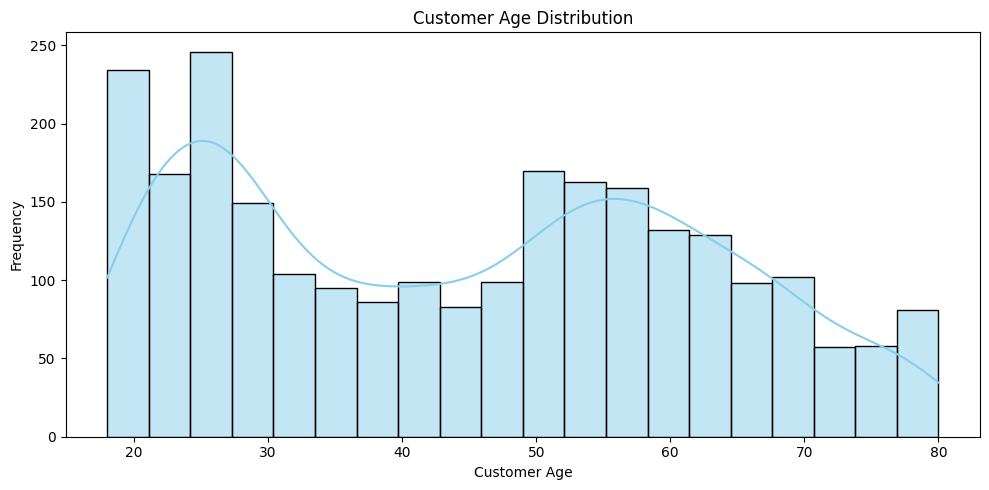

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(10, 5))

# Plot the histogram
sns.histplot(df['CustomerAge'], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



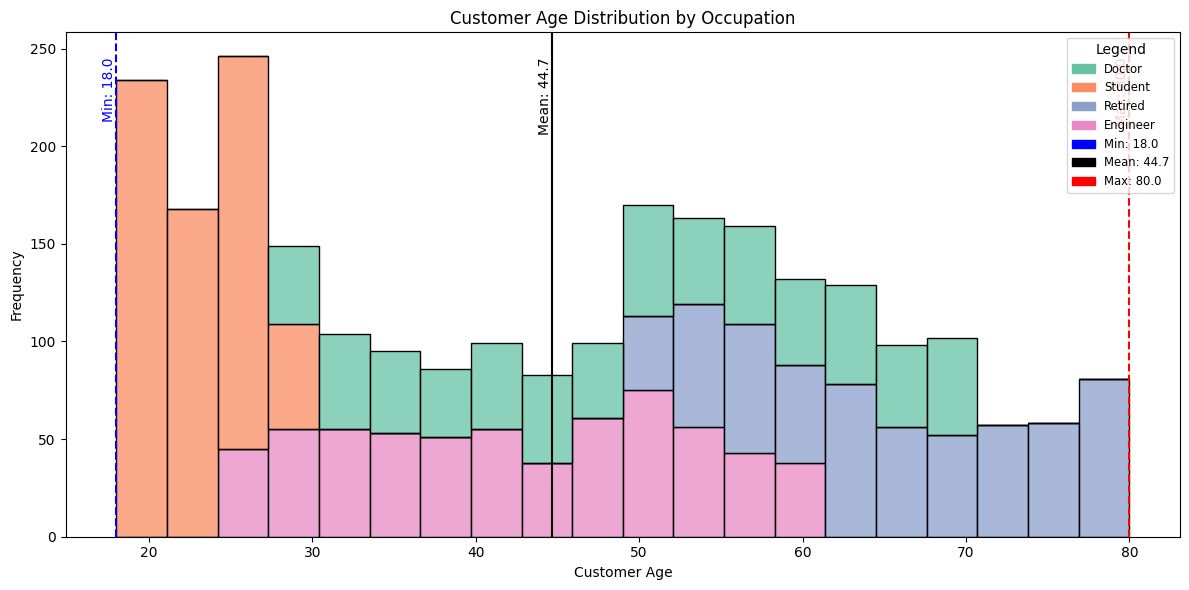

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Clean and prepare
df_clean = df.dropna(subset=['CustomerOccupation'])
occupations = df_clean['CustomerOccupation'].unique()
palette = sns.color_palette('Set2', n_colors=len(occupations))
occupation_color_map = dict(zip(occupations, palette))

# Calculate stats
min_age = df_clean['CustomerAge'].min()
max_age = df_clean['CustomerAge'].max()
mean_age = df_clean['CustomerAge'].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_clean,
    x='CustomerAge',
    hue='CustomerOccupation',
    bins=20,
    multiple='stack',
    palette=occupation_color_map,
    edgecolor='black'
)

# Add vertical lines
plt.axvline(min_age, color='blue', linestyle='--', linewidth=1.5)
plt.axvline(mean_age, color='black', linestyle='-', linewidth=1.5)
plt.axvline(max_age, color='red', linestyle='--', linewidth=1.5)

# Annotate each line with value
plt.text(min_age, plt.ylim()[1]*0.95, f'Min: {min_age:.1f}', color='blue', rotation=90, va='top', ha='right')
plt.text(mean_age, plt.ylim()[1]*0.95, f'Mean: {mean_age:.1f}', color='black', rotation=90, va='top', ha='right')
plt.text(max_age, plt.ylim()[1]*0.95, f'Max: {max_age:.1f}', color='red', rotation=90, va='top', ha='right')

# Title & axis labels
plt.title('Customer Age Distribution by Occupation')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

# Create legend
occupation_legend = [Patch(color=color, label=occupation) for occupation, color in occupation_color_map.items()]
stat_legend = [
    Patch(color='blue', label=f'Min: {min_age:.1f}'),
    Patch(color='black', label=f'Mean: {mean_age:.1f}'),
    Patch(color='red', label=f'Max: {max_age:.1f}')
]

# Combine legends
plt.legend(
    handles=occupation_legend + stat_legend,
    title='Legend',
    title_fontsize='medium',
    fontsize='small',
    loc='upper right'
)

plt.tight_layout()
plt.show()


Customer ages range from 18 to 80 years old, with an average age of 44.

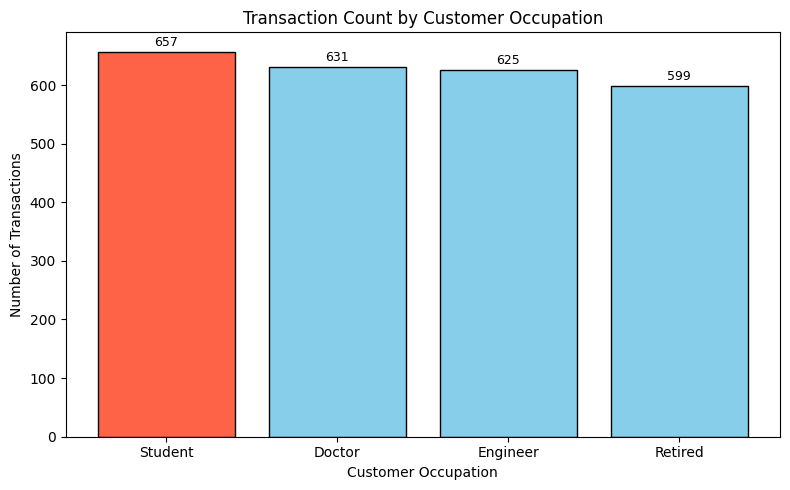

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count transactions by occupation
occupation_counts = df['CustomerOccupation'].value_counts().sort_values(ascending=False)

# Define colors: highlight "Student"
colors = ['tomato' if occ == 'Student' else 'skyblue' for occ in occupation_counts.index]

plt.figure(figsize=(8, 5))
bars = plt.bar(occupation_counts.index, occupation_counts.values, color=colors, edgecolor='black')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.title('Transaction Count by Customer Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Number of Transactions')


plt.tight_layout()
plt.show()


Notably, transactions are dominated by Students, accounting for 657 transactions, followed closely by Doctors and Engineers with 631 and 625 transactions, respectively.

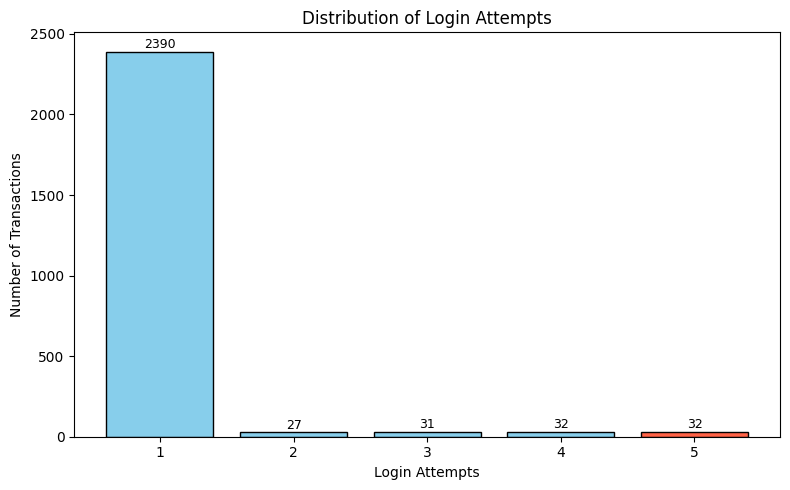

In [21]:
import matplotlib.pyplot as plt

# Count frequency of login attempts
login_counts = df['LoginAttempts'].value_counts().sort_index()

# Define bar colors: default blue, red for 5 login attempts
colors = ['tomato' if attempt == 5 else 'skyblue' for attempt in login_counts.index]

plt.figure(figsize=(8, 5))
bars = plt.bar(login_counts.index, login_counts.values, color=colors, edgecolor='black')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.title('Distribution of Login Attempts')
plt.xlabel('Login Attempts')
plt.ylabel('Number of Transactions')


plt.tight_layout()
plt.show()


Most customers required only one login attempt, but five login attempts were also observed in 32 out of 2,512 transactions, making them unusual but not rare.

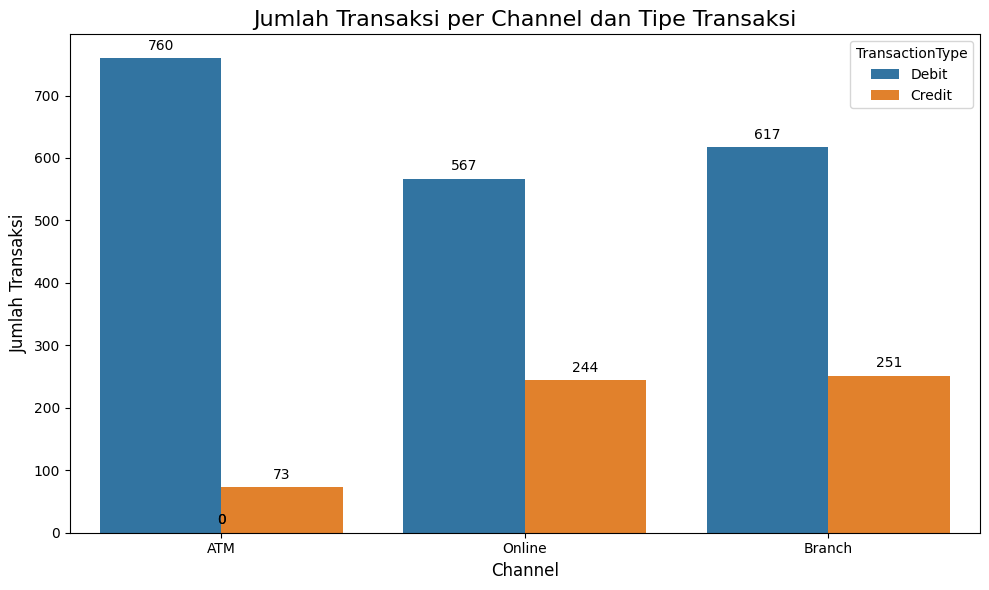

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan dataframe Anda sudah dimuat dan bernama 'df'

# Buat plot dan simpan object Axes-nya
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Channel", hue="TransactionType")

# Tambahkan nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Tambahkan judul dan label
ax.set_title('Jumlah Transaksi per Channel dan Tipe Transaksi', fontsize=16)
ax.set_xlabel('Channel', fontsize=12)
ax.set_ylabel('Jumlah Transaksi', fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

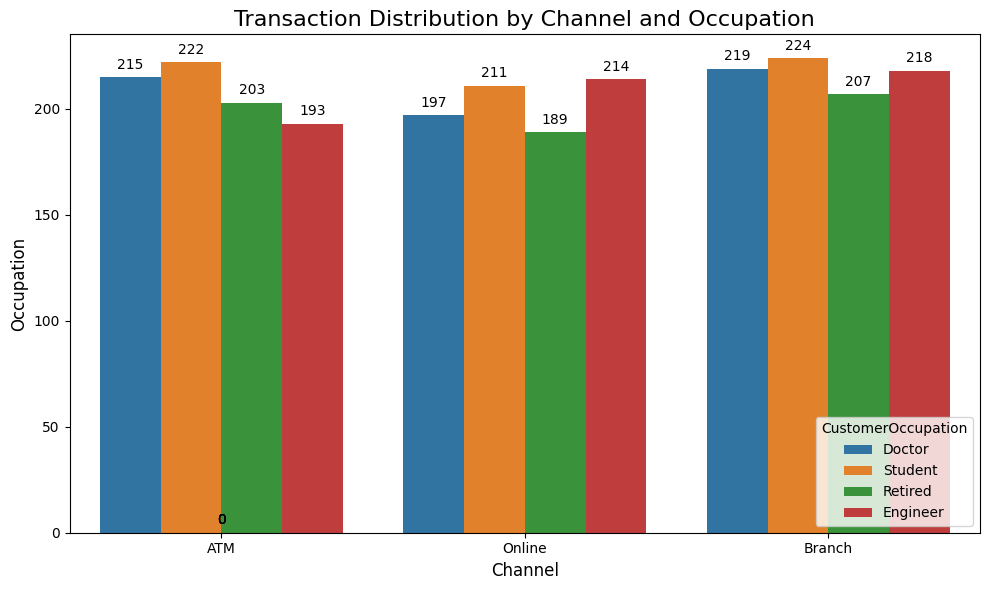

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan dataframe Anda sudah dimuat dan bernama 'df'

# Buat plot dan simpan object Axes-nya
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Channel", hue="CustomerOccupation")

# Tambahkan nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Tambahkan judul dan label
ax.set_title('Transaction Distribution by Channel and Occupation', fontsize=16)
ax.set_xlabel('Channel', fontsize=12)
ax.set_ylabel('Occupation', fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

In [24]:
print(df)

     TransactionID AccountID  TransactionAmount     TransactionDate  \
0         TX000001   AC00128              14.09 2023-04-11 16:29:14   
1         TX000002   AC00455             376.24 2023-06-27 16:44:19   
2         TX000003   AC00019             126.29 2023-07-10 18:16:08   
3         TX000004   AC00070             184.50 2023-05-05 16:32:11   
4         TX000005   AC00411              13.45 2023-10-16 17:51:24   
...            ...       ...                ...                 ...   
2507      TX002508   AC00297             856.21 2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54 2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63 2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97 2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08 2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.218.92      

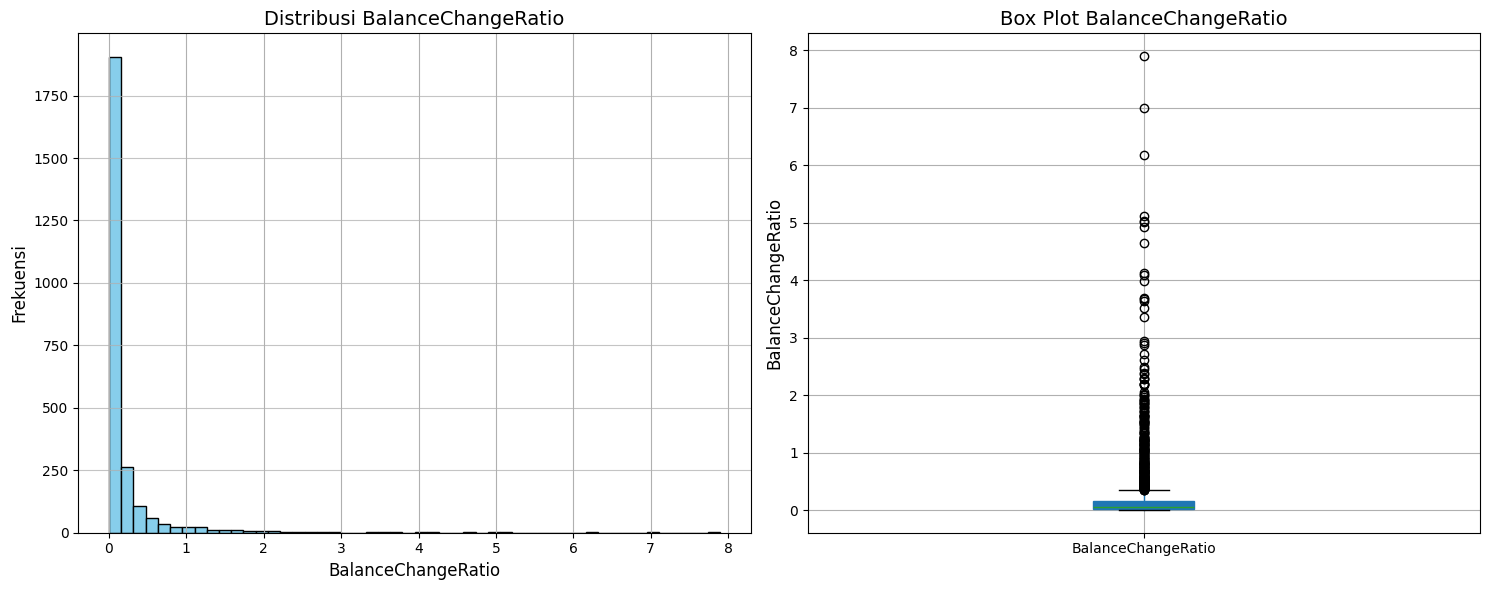

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumsikan dataframe Anda sudah dimuat dan bernama 'df'

# Atur ukuran plot
plt.figure(figsize=(15, 6))

# Subplot 1: Histogram
plt.subplot(1, 2, 1)
df['BalanceChangeRatio'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribusi BalanceChangeRatio', fontsize=14)
plt.xlabel('BalanceChangeRatio', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', alpha=0.75)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
df.boxplot(column='BalanceChangeRatio', patch_artist=True)
plt.title('Box Plot BalanceChangeRatio', fontsize=14)
plt.ylabel('BalanceChangeRatio', fontsize=12)

# Sesuaikan tata letak agar tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

# Jika Anda ingin menyimpan plot ke file
# plt.savefig('balance_change_ratio_visualization.png')

Minimum Ratio: 0.0000
Maximum Ratio: 7.8960
Mean Ratio: 0.2000


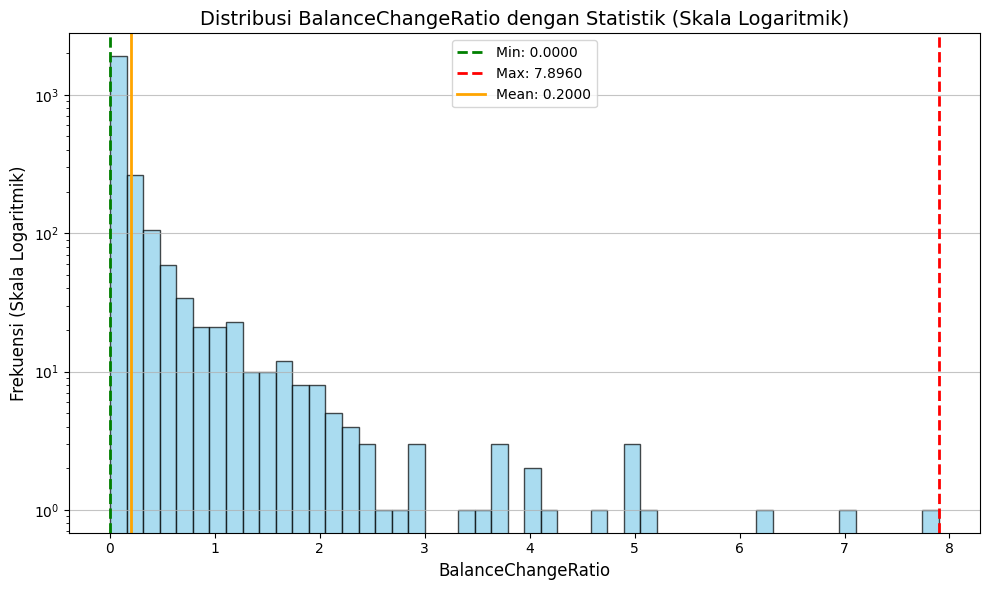

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Asumsikan dataframe Anda sudah dimuat dan bernama 'df'

# Hitung statistik min, max, dan mean
min_ratio = df['BalanceChangeRatio'].min()
max_ratio = df['BalanceChangeRatio'].max()
mean_ratio = df['BalanceChangeRatio'].mean()

# Cetak hasilnya agar Anda tahu nilai pastinya
print(f"Minimum Ratio: {min_ratio:.4f}")
print(f"Maximum Ratio: {max_ratio:.4f}")
print(f"Mean Ratio: {mean_ratio:.4f}")

# --- Plotting ---
# Buat figure dan axes
fig, ax = plt.subplots(figsize=(10, 6))

# Buat histogram dengan skala logaritmik
ax.hist(df['BalanceChangeRatio'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax.set_yscale('log') # Set sumbu y ke skala logaritmik

# Tambahkan garis vertikal untuk min, max, dan mean
ax.axvline(min_ratio, color='green', linestyle='--', linewidth=2, label=f'Min: {min_ratio:.4f}')
ax.axvline(max_ratio, color='red', linestyle='--', linewidth=2, label=f'Max: {max_ratio:.4f}')
ax.axvline(mean_ratio, color='orange', linestyle='-', linewidth=2, label=f'Mean: {mean_ratio:.4f}')

# Tambahkan legenda untuk menjelaskan garis-garis tersebut
ax.legend()

# Tambahkan judul dan label
ax.set_title('Distribusi BalanceChangeRatio dengan Statistik (Skala Logaritmik)', fontsize=14)
ax.set_xlabel('BalanceChangeRatio', fontsize=12)
ax.set_ylabel('Frekuensi (Skala Logaritmik)', fontsize=12)
ax.grid(axis='y', alpha=0.75)

# Tampilkan plot
plt.tight_layout()
plt.show()

# Jika Anda ingin menyimpan plot ke file
# plt.savefig('balance_change_ratio_log_histogram_with_stats.png')

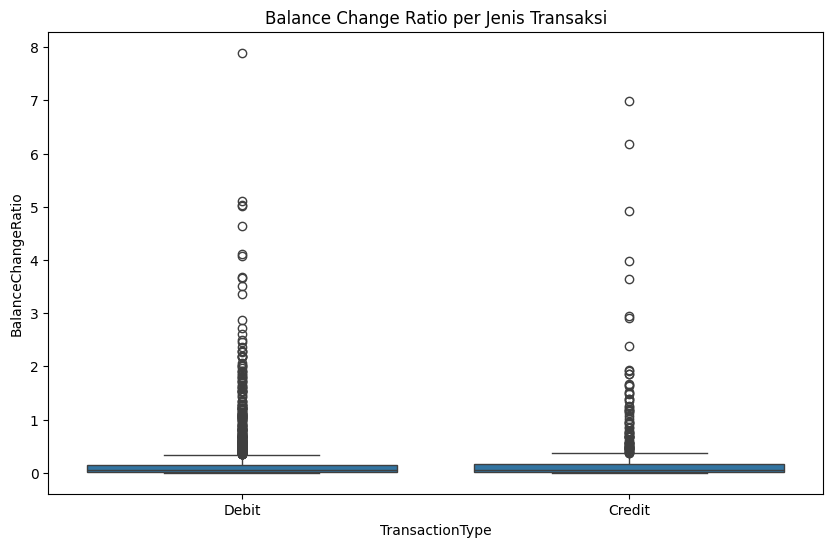

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x="TransactionType", y="BalanceChangeRatio", data=df)
plt.title("Balance Change Ratio per Jenis Transaksi")
plt.show()

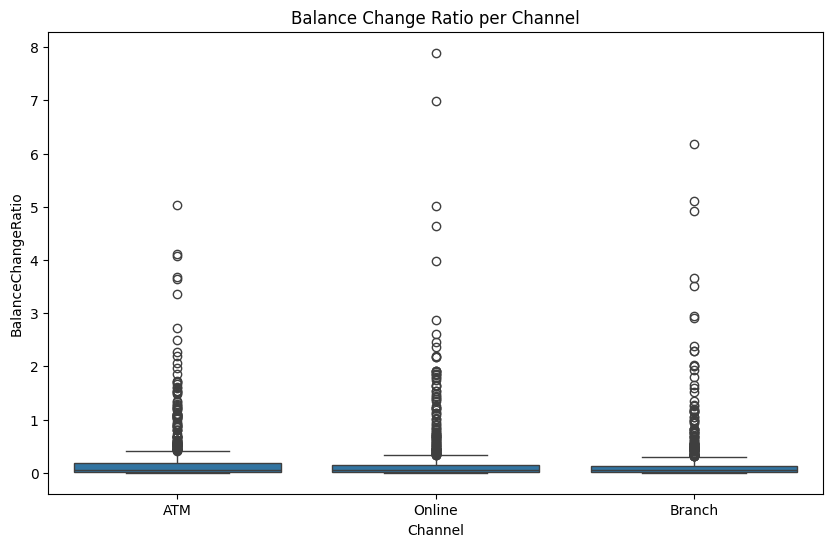

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Channel", y="BalanceChangeRatio", data=df)
plt.title("Balance Change Ratio per Channel")
plt.show()

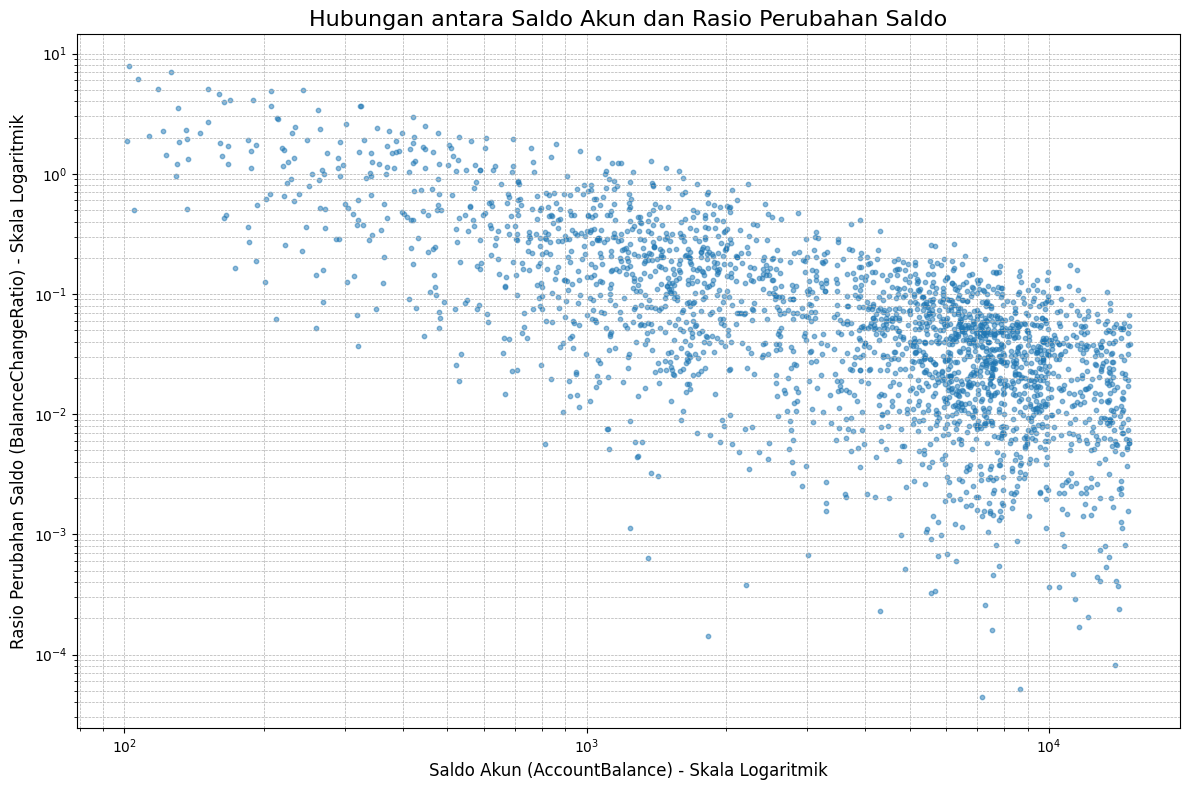

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Asumsikan dataframe Anda sudah dimuat dan bernama 'df'

# --- Plotting Scatter Plot ---
# Buat figure dan axes
fig, ax = plt.subplots(figsize=(12, 8))

# Buat scatter plot
# Kita plot BalanceChangeRatio (sumbu y) terhadap AccountBalance (sumbu x)
# Tambahkan alpha untuk melihat densitas titik yang bertumpuk
ax.scatter(df['AccountBalance'], df['BalanceChangeRatio'], alpha=0.5, s=10)

# Atur kedua sumbu ke skala logaritmik
ax.set_xscale('log')
ax.set_yscale('log')

# Tambahkan judul dan label
ax.set_title('Hubungan antara Saldo Akun dan Rasio Perubahan Saldo', fontsize=16)
ax.set_xlabel('Saldo Akun (AccountBalance) - Skala Logaritmik', fontsize=12)
ax.set_ylabel('Rasio Perubahan Saldo (BalanceChangeRatio) - Skala Logaritmik', fontsize=12)
ax.grid(True, which="both", ls="--", linewidth=0.5)

# Tampilkan plot
plt.tight_layout()
plt.show()

# Jika Anda ingin menyimpan plot ke file
# plt.savefig('log_scatter_plot_balance_change_ratio.png')

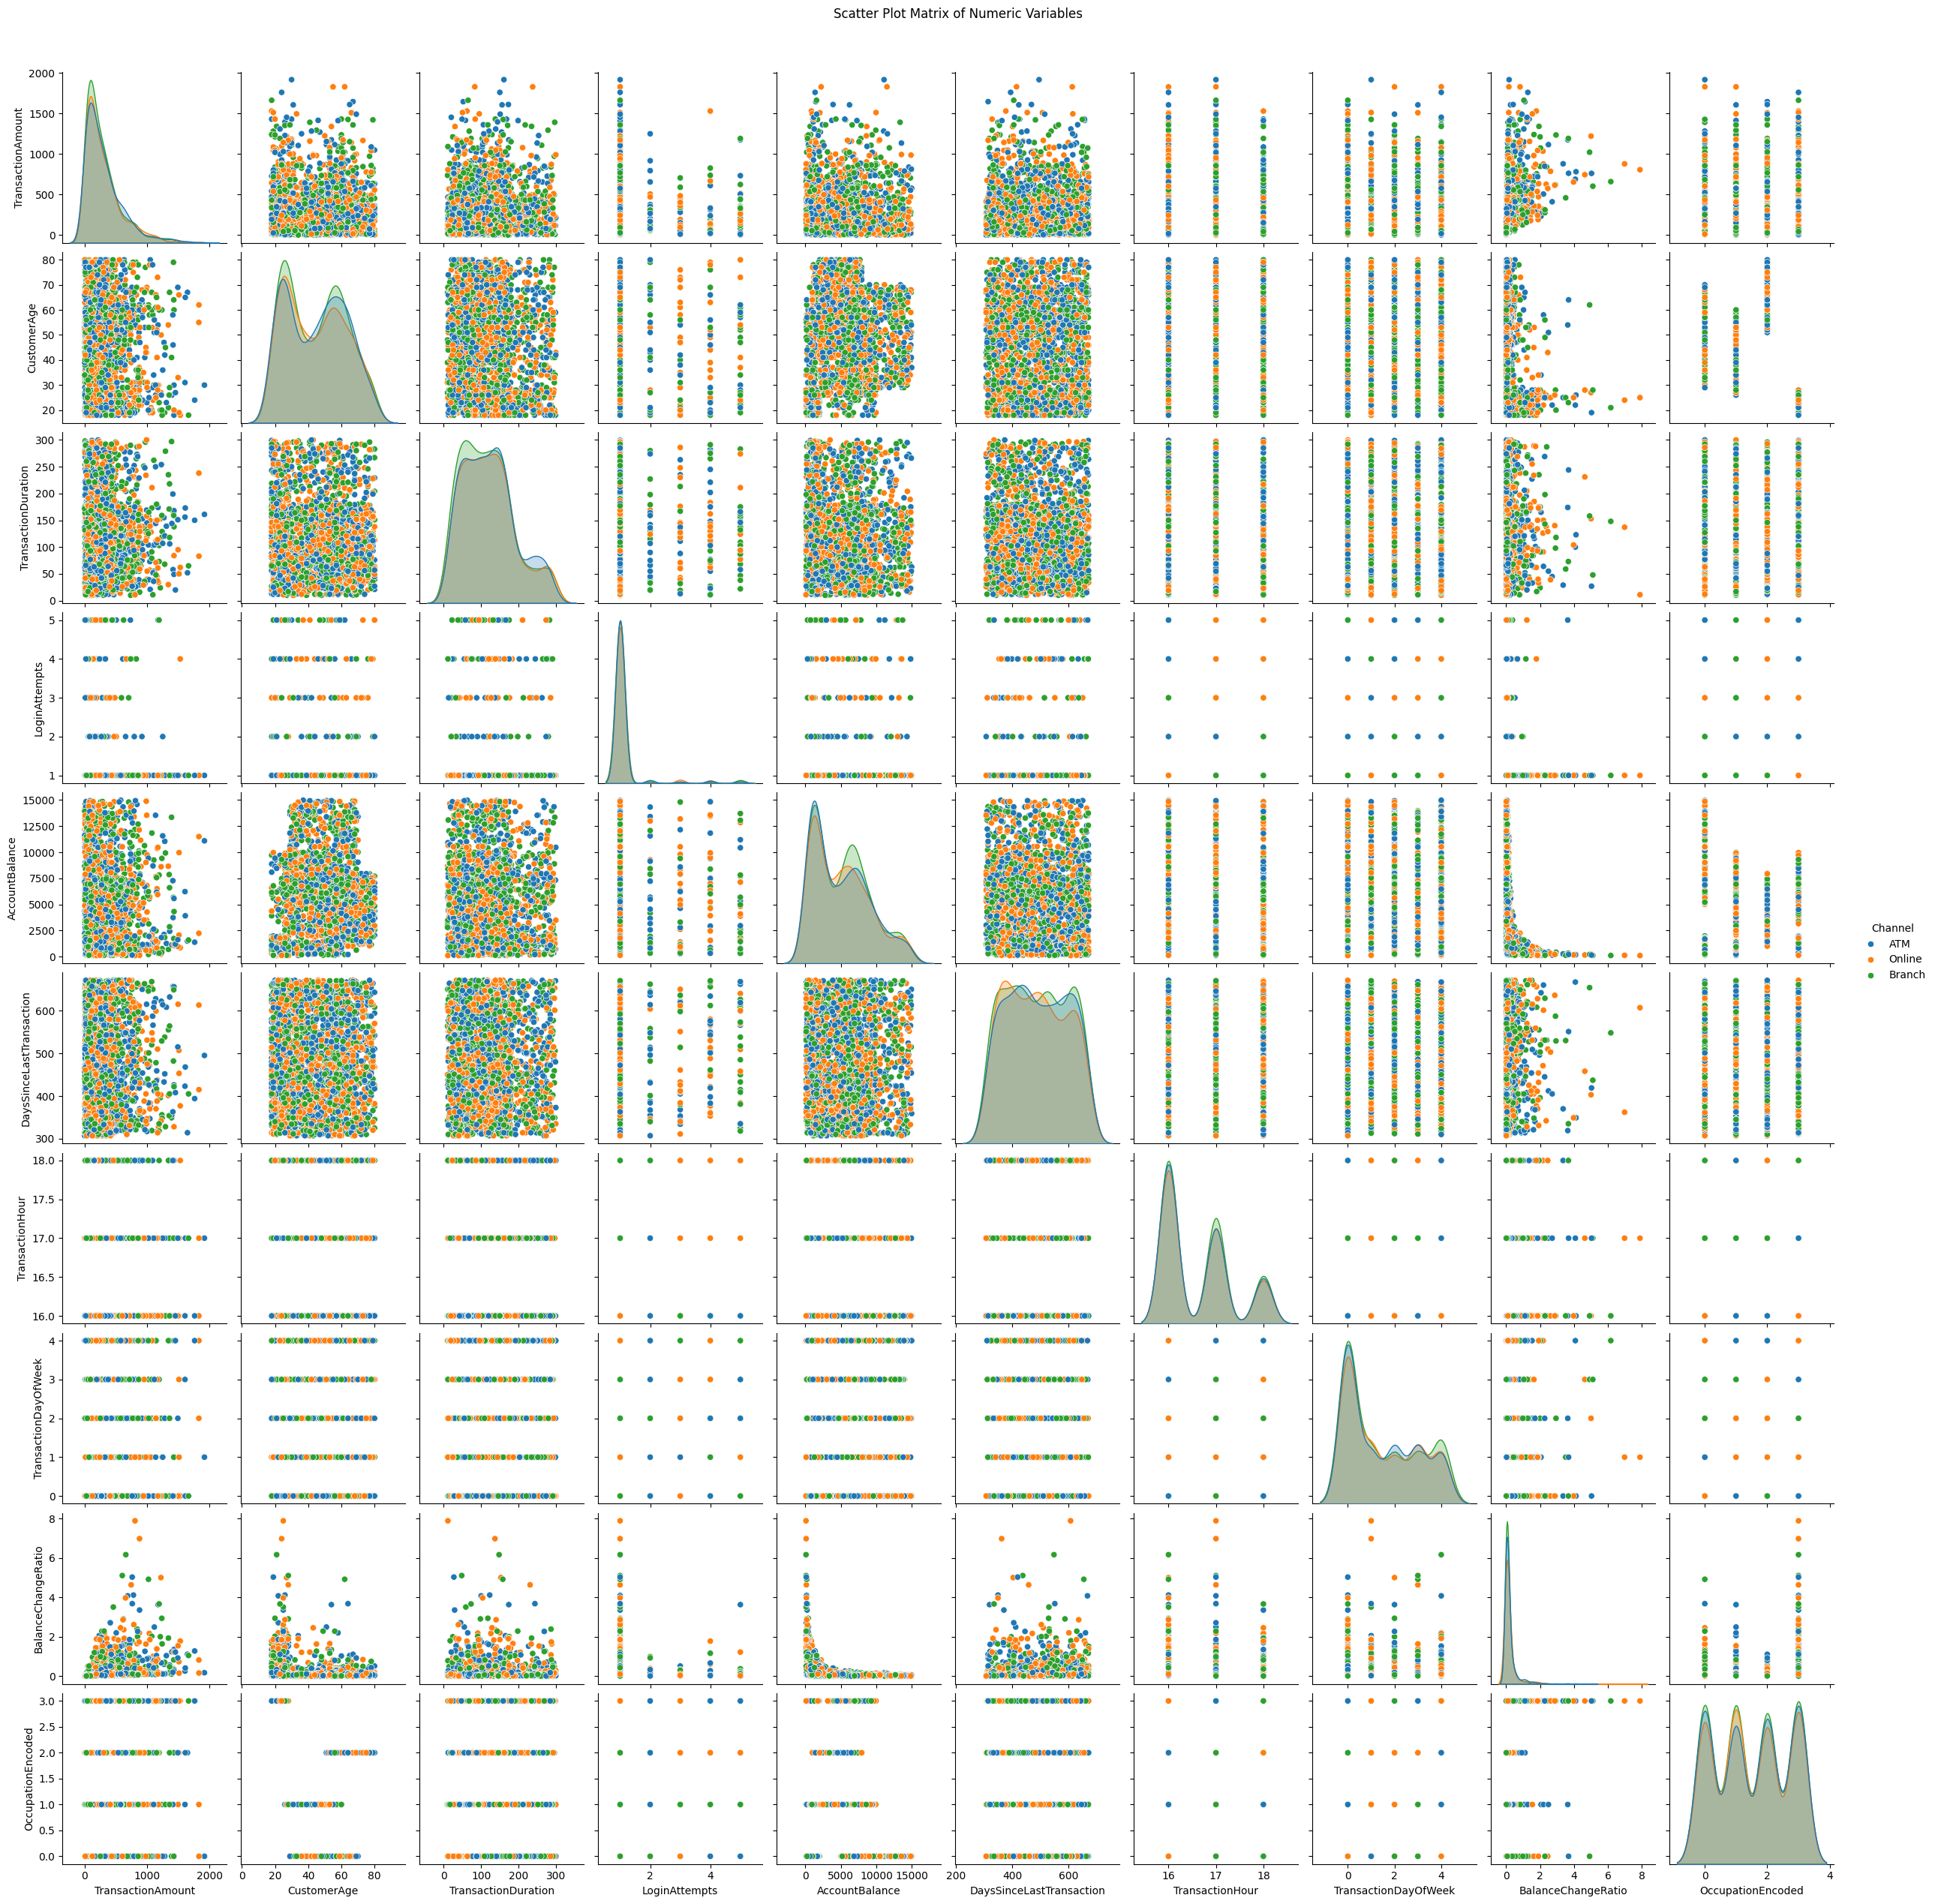

In [30]:
numeric_df = df.select_dtypes(include=['number'])

# --- Create the Pair Plot ---
# Use seaborn's pairplot function to create a matrix of scatter plots.
# The diagonal plots show the distribution of a single variable (a histogram).
sns.pairplot(df, hue="Channel")

# Add a title to the entire figure to make it more descriptive.
plt.suptitle('Scatter Plot Matrix of Numeric Variables', y=1.02)

# Display the plot.
plt.show()

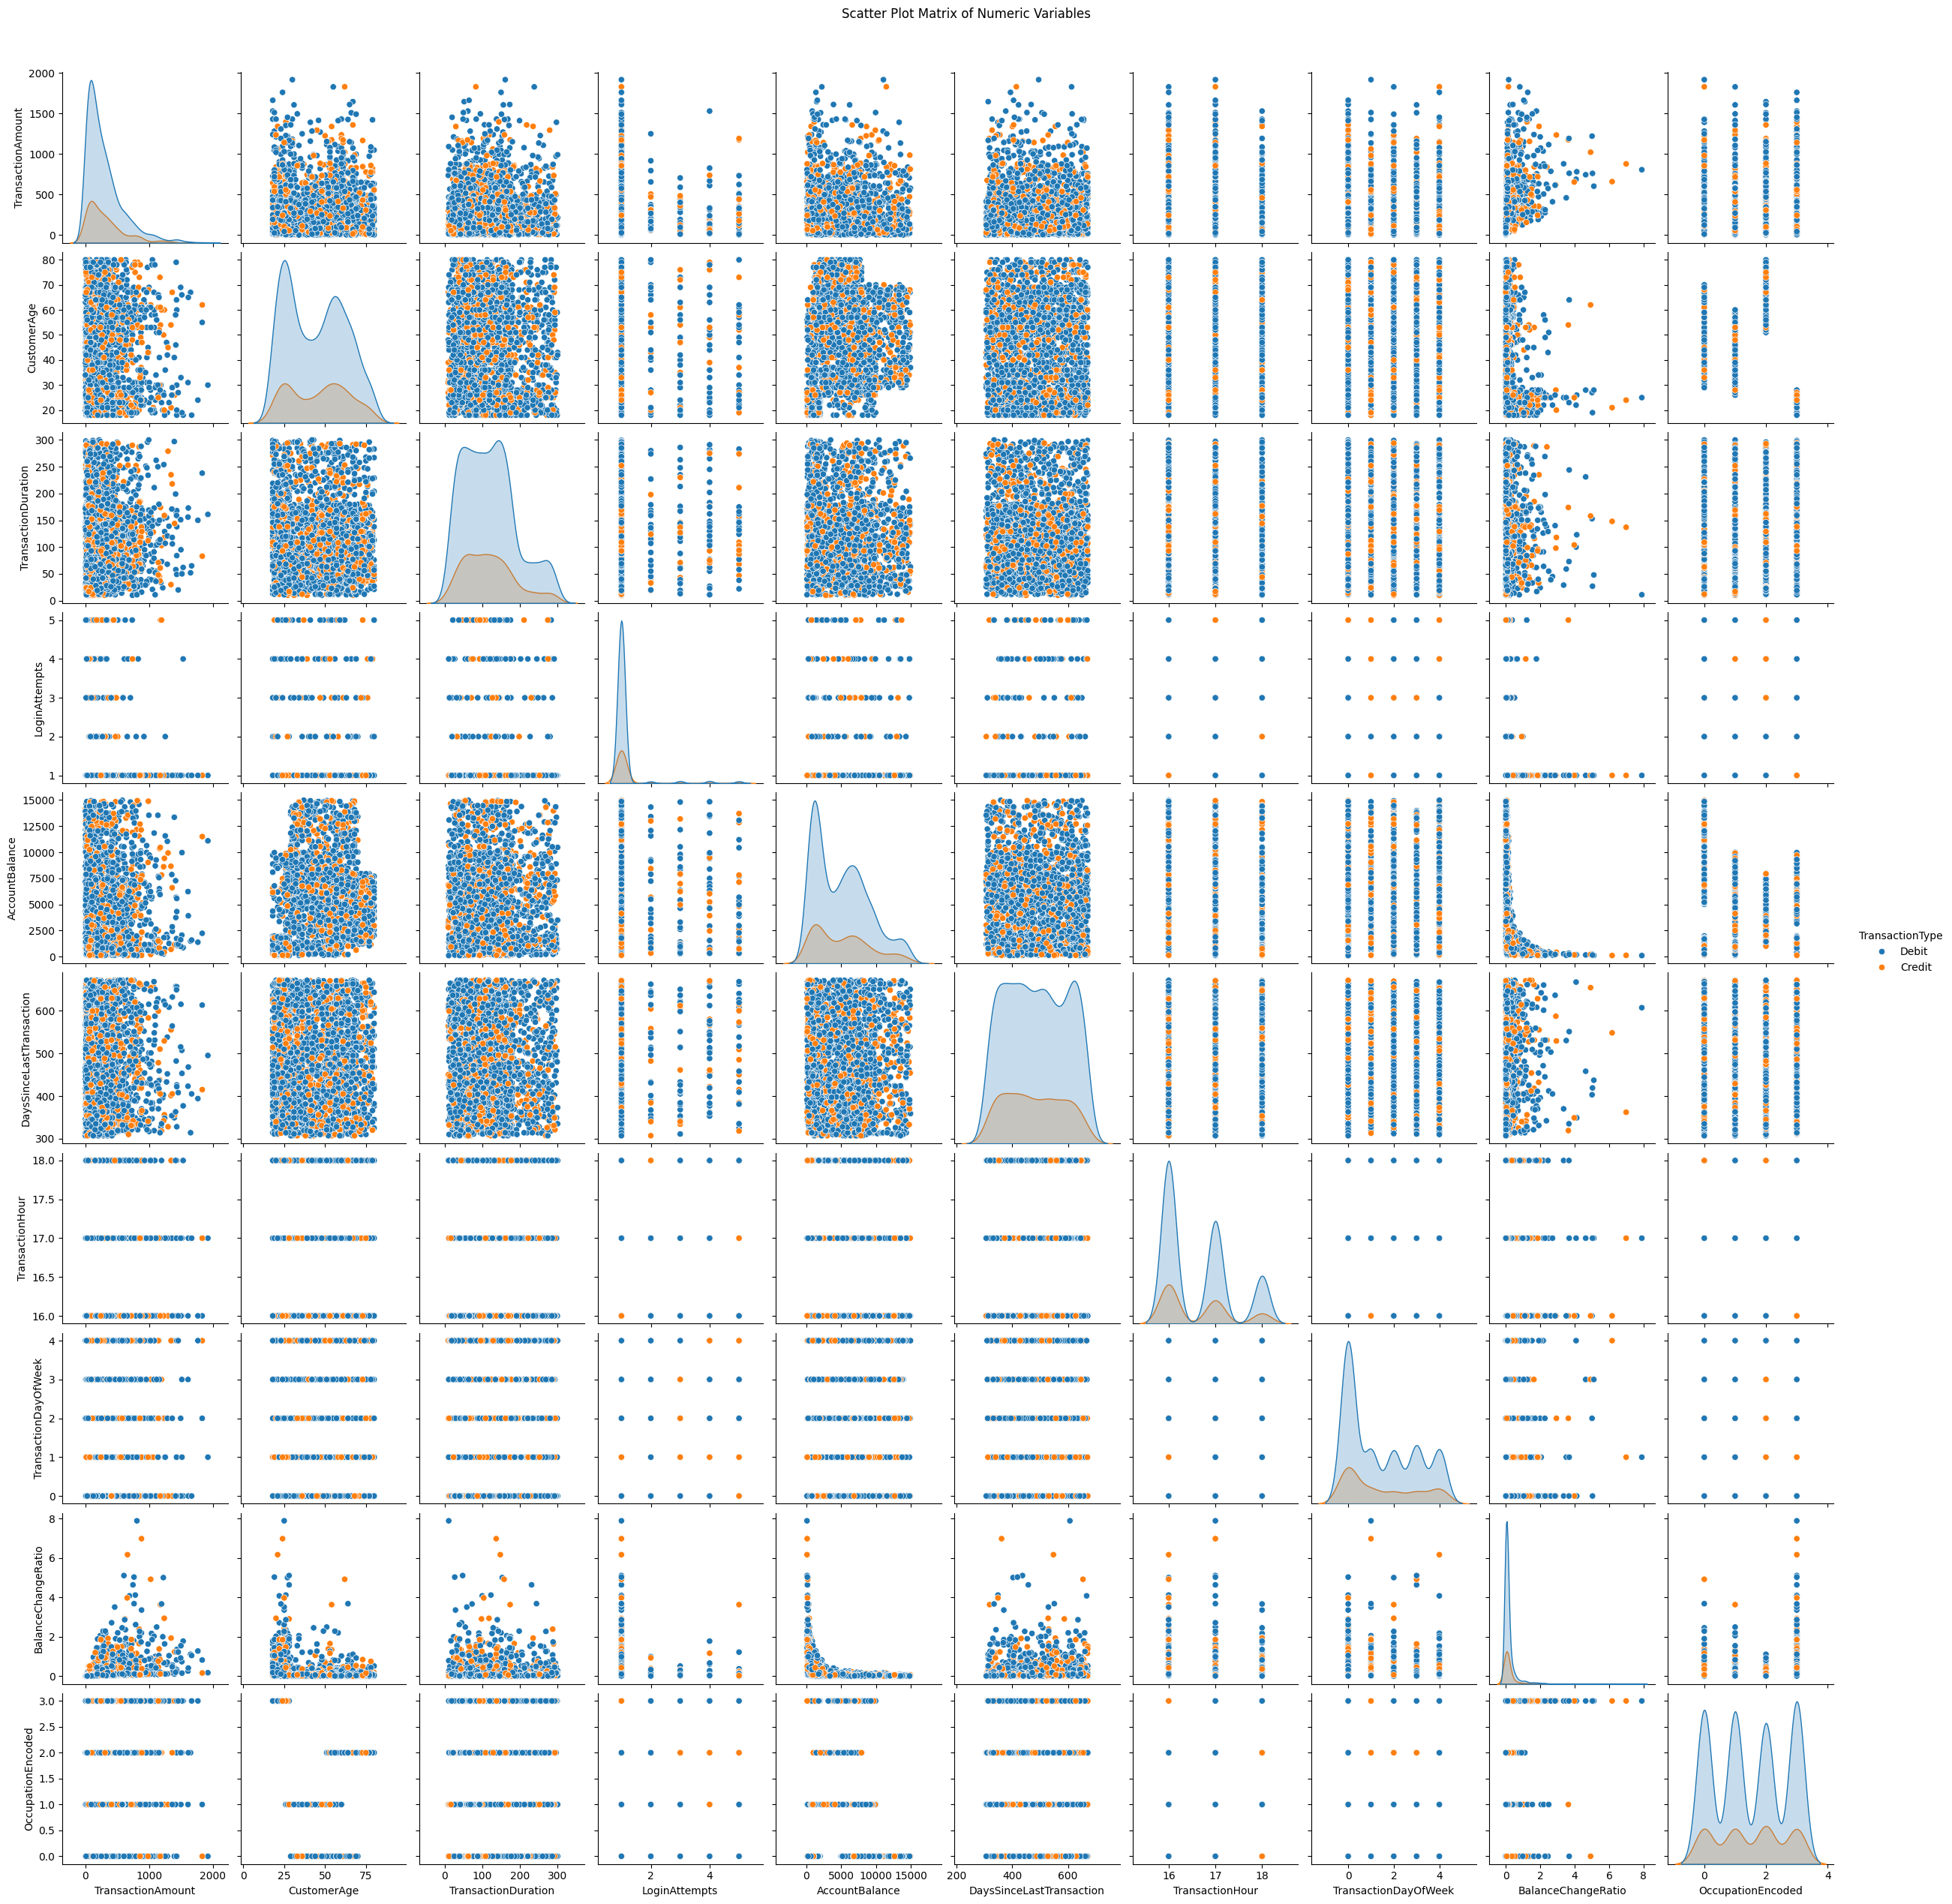

In [31]:
numeric_df = df.select_dtypes(include=['number'])

# --- Create the Pair Plot ---
# Use seaborn's pairplot function to create a matrix of scatter plots.
# The diagonal plots show the distribution of a single variable (a histogram).
sns.pairplot(df, hue="TransactionType")

# Add a title to the entire figure to make it more descriptive.
plt.suptitle('Scatter Plot Matrix of Numeric Variables', y=1.02)

# Display the plot.
plt.show()

In [32]:
print(df)

     TransactionID AccountID  TransactionAmount     TransactionDate  \
0         TX000001   AC00128              14.09 2023-04-11 16:29:14   
1         TX000002   AC00455             376.24 2023-06-27 16:44:19   
2         TX000003   AC00019             126.29 2023-07-10 18:16:08   
3         TX000004   AC00070             184.50 2023-05-05 16:32:11   
4         TX000005   AC00411              13.45 2023-10-16 17:51:24   
...            ...       ...                ...                 ...   
2507      TX002508   AC00297             856.21 2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54 2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63 2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97 2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08 2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.218.92      

In [33]:
# Define the numerical columns to check for outliers
columns_to_check = ['TransactionAmount', 'BalanceChangeRatio', 'TransactionDuration', 'LoginAttempts', 'CustomerAge']

# Print a header for the analysis
print("--- Outlier Analysis using IQR Method ---")
print("-" * 50)

# Loop through each column and perform the IQR analysis
for column in columns_to_check:
    try:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find the outliers that fall outside the bounds
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Print the results for the current column
        print(f"\nAnalyzing column: '{column}'")
        print(f"  Number of outliers found: {len(outliers)}")
        print(f"  Lower Bound: {lower_bound:.2f}")
        print(f"  Upper Bound: {upper_bound:.2f}")

        # If outliers exist, print the first few rows to inspect them
        if not outliers.empty:
            print("\n  Sample Outliers:")
            # Use to_string() and index=False for clean printing in the console
            print(outliers[['TransactionID', column]].head().to_string(index=False))
        else:
            print("\n  No significant outliers detected.")

    except KeyError:
        print(f"Column '{column}' not found in the DataFrame.")

print("\n" + "-" * 50)
print("Analysis complete.")

--- Outlier Analysis using IQR Method ---
--------------------------------------------------

Analyzing column: 'TransactionAmount'
  Number of outliers found: 113
  Lower Bound: -417.08
  Upper Bound: 913.49

  Sample Outliers:
TransactionID  TransactionAmount
     TX000075            1212.51
     TX000083             922.55
     TX000086            1340.19
     TX000111            1045.22
     TX000130            1036.66

Analyzing column: 'BalanceChangeRatio'
  Number of outliers found: 310
  Lower Bound: -0.18
  Upper Bound: 0.35

  Sample Outliers:
TransactionID  BalanceChangeRatio
     TX000010            0.798489
     TX000014            4.121250
     TX000015            0.556763
     TX000017            0.491311
     TX000027            0.366719

Analyzing column: 'TransactionDuration'
  Number of outliers found: 0
  Lower Bound: -84.00
  Upper Bound: 308.00

  No significant outliers detected.

Analyzing column: 'LoginAttempts'
  Number of outliers found: 122
  Lower Bound: 1.

--- Outlier Analysis with Box Plots ---
--------------------------------------------------


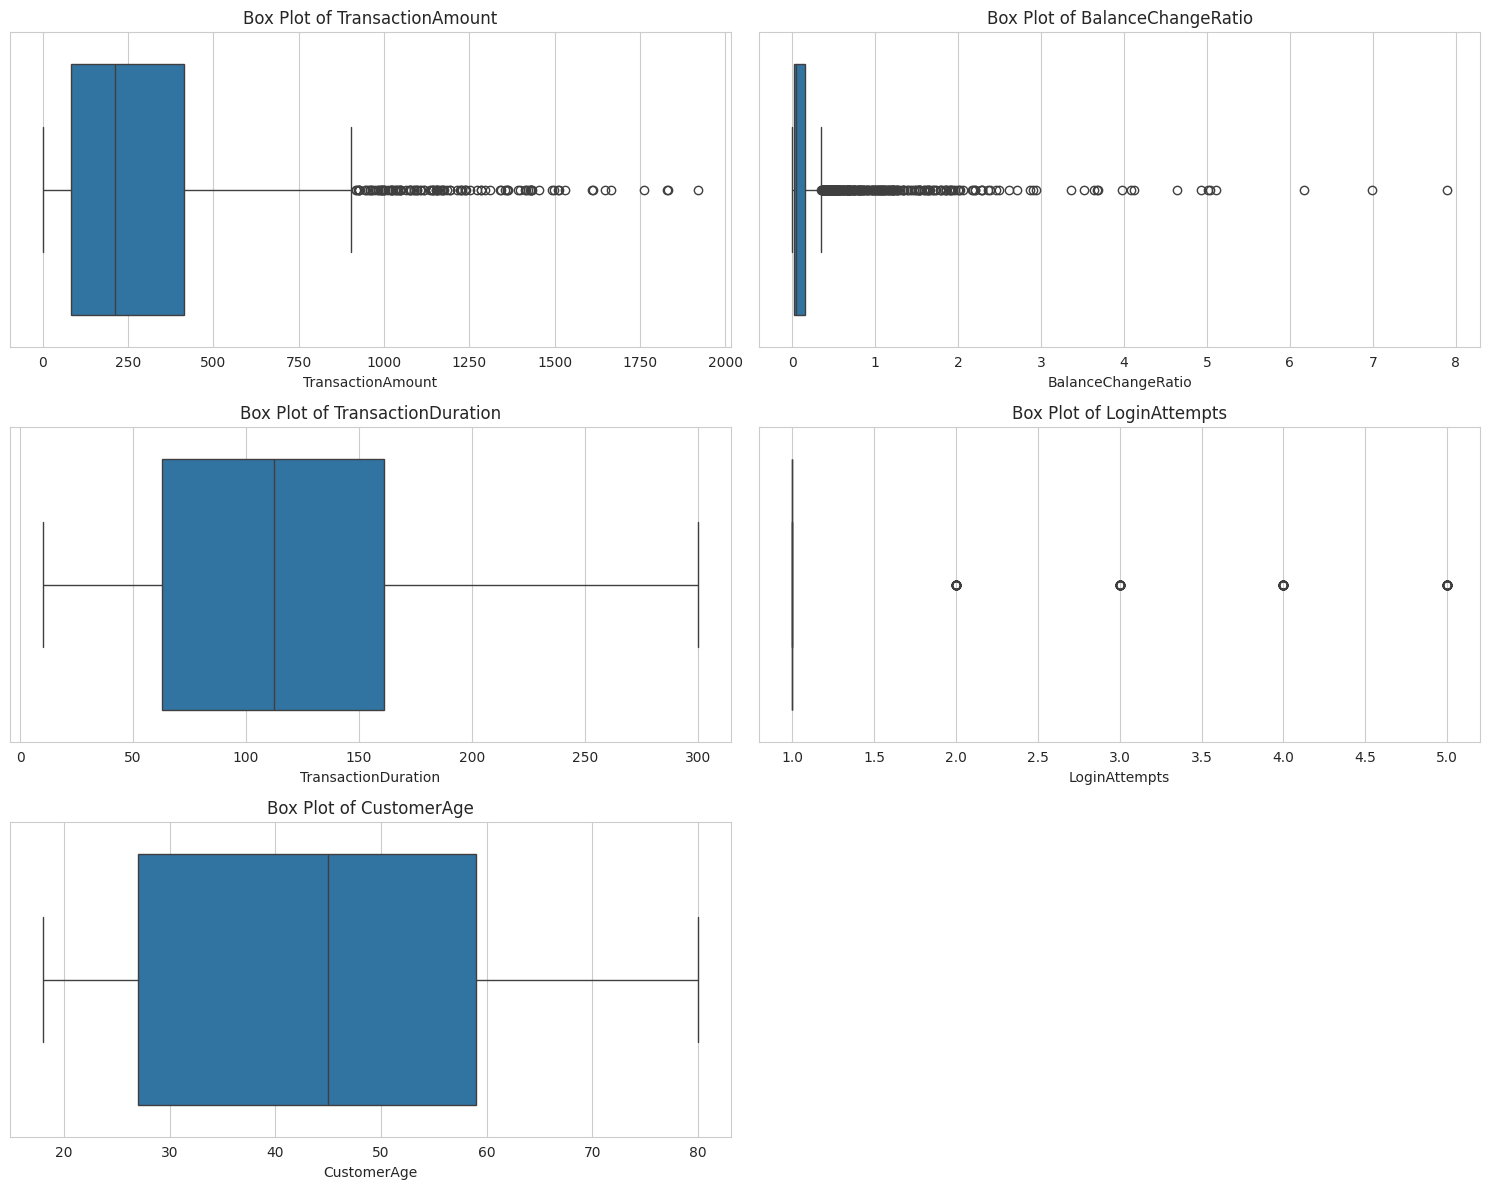


--------------------------------------------------
Analysis complete. The box plots above visualize the distribution and outliers for each column.


In [34]:
# Define the numerical columns to check for outliers
columns_to_check = ['TransactionAmount', 'BalanceChangeRatio', 'TransactionDuration', 'LoginAttempts', 'CustomerAge']

# Print a header for the analysis
print("--- Outlier Analysis with Box Plots ---")
print("-" * 50)

# Set up the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

# Loop through each column and perform the IQR analysis and visualization
for i, column in enumerate(columns_to_check):
    try:
        # Create a subplot for each column
        plt.subplot(3, 2, i + 1)
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)

        # Optionally, you can also print the quantitative summary below
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # print(f"\nAnalyzing column: '{column}'")
        # print(f"  Number of outliers found: {len(outliers)}")
        # print(f"  Lower Bound: {lower_bound:.2f}")
        # print(f"  Upper Bound: {upper_bound:.2f}")

    except KeyError:
        print(f"Column '{column}' not found in the DataFrame.")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

print("\n" + "-" * 50)
print("Analysis complete. The box plots above visualize the distribution and outliers for each column.")

In [35]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Assuming your full dataframe is loaded as 'df'
# For this demonstration, we'll use a copy of the dataframe
# to avoid modifying the original
df_for_analysis = df.copy()

# Define the numerical columns to use for multivariate outlier detection
# These are the same suspicious variables we identified earlier
columns_for_detection = ['TransactionAmount', 'BalanceChangeRatio', 'TransactionDuration', 'LoginAttempts', 'CustomerAge']

# Extract the data for the selected columns
X = df_for_analysis[columns_for_detection]

# Initialize the Isolation Forest model
# The 'contamination' parameter is a crucial hyperparameter that specifies
# the expected proportion of outliers in the dataset. A common value is 0.01 (1%).
# We will use 'auto' to let the algorithm estimate a contamination level
# but for real-world scenarios, a specific value is often preferred.
model = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the data and predict the anomalies
# The fit_predict method returns -1 for outliers and 1 for inliers.
df_for_analysis['outlier_label'] = model.fit_predict(X)

# Filter the dataframe to show only the outliers
# Outliers are marked with -1
outliers = df_for_analysis[df_for_analysis['outlier_label'] == -1]

# Print the results
print("--- Multivariate Anomaly Detection with Isolation Forest ---")
print("-" * 65)
print(f"\nTotal number of outliers detected: {len(outliers)}")
print("\nSample of detected outlier transactions:")
print(outliers[['TransactionID'] + columns_for_detection].head().to_string(index=False))

print("\n" + "-" * 65)
print("Analysis complete.")


--- Multivariate Anomaly Detection with Isolation Forest ---
-----------------------------------------------------------------

Total number of outliers detected: 370

Sample of detected outlier transactions:
TransactionID  TransactionAmount  BalanceChangeRatio  TransactionDuration  LoginAttempts  CustomerAge
     TX000008             171.42            0.061304                  291              1           67
     TX000014             781.76            4.121250                  123              1           26
     TX000024             345.84            0.246588                  142              3           22
     TX000027             246.93            0.366719                  158              5           23
     TX000033             396.45            0.040913                  168              3           49

-----------------------------------------------------------------
Analysis complete.


In [36]:
import pandas as pd

# The 'outliers' DataFrame is the result of the Isolation Forest analysis
# For this code to work, ensure 'outliers' has been generated from the previous step.

# Let's assume your original 'df' DataFrame has these categorical columns.
# We'll merge the outlier information back to the original df to get the categorical data.
# Note: This assumes the original 'df' and 'outliers' share a common index or key.
# If not, you may need a more robust merge strategy.
df['is_outlier'] = df.index.isin(outliers.index).astype(int)
outliers_with_categories = df[df['is_outlier'] == 1]

# Define the categorical columns you want to analyze
categorical_columns = ['TransactionType', 'Channel']

print("--- Categorical Breakdown of Outliers ---")
print("-" * 40)

for column in categorical_columns:
    try:
        # Check if the column exists and has non-null values
        if column in outliers_with_categories.columns and not outliers_with_categories[column].isnull().all():
            print(f"\nBreakdown for '{column}':")
            # Group by the categorical column and count the number of outliers
            outlier_counts = outliers_with_categories.groupby(column).size().reset_index(name='OutlierCount')
            # Calculate the percentage for a more intuitive understanding
            total_outliers = len(outliers_with_categories)
            outlier_counts['Percentage'] = (outlier_counts['OutlierCount'] / total_outliers) * 100

            print(outlier_counts.to_string(index=False))
        else:
            print(f"\nWarning: Column '{column}' not found or contains only null values in the outlier dataset.")
    except Exception as e:
        print(f"\nError processing column '{column}': {e}")

print("\n" + "-" * 40)
print("Categorical analysis complete.")


--- Categorical Breakdown of Outliers ---
----------------------------------------

Breakdown for 'TransactionType':
TransactionType  OutlierCount  Percentage
         Credit            86   23.243243
          Debit           284   76.756757

Breakdown for 'Channel':
Channel  OutlierCount  Percentage
    ATM           134   36.216216
 Branch           117   31.621622
 Online           119   32.162162

----------------------------------------
Categorical analysis complete.
